# Approches 

in this method, we will develop Feedfowrod neural network for multi label class learnings. in this section we will start like data preparation for TFIDF generation for input X and then we will impliment model.

finally model evaluation and hyper parameter tuning.

In [1]:
import pickle
import numpy as np
import pandas as pd 
import tensorflow as tf

from keras.models import Sequential
from keras.layers import *  
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from keras.optimizers import SGD

import itertools
import collections 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loadind train and test data 

with open("/content/drive/MyDrive/MSC/train_data_label_coherence_hierarchy_1.pkl","rb") as file:
  df_train_data = pickle.load(file)


with open("/content/drive/MyDrive/MSC/test_data_label_coherence_hierarchy_1.pkl","rb") as file:
  df_test_data = pickle.load(file)

In [ ]:
all_words = list(itertools.chain(*df_train_data.body_tokens_clean_stemmer))
counts_of_words = collections.Counter(all_words)
len(counts_of_words)

117145

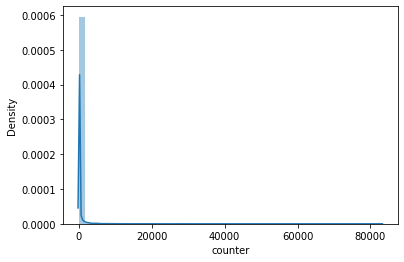

In [ ]:
all_words = list(itertools.chain(*df_train_data.body_tokens_clean_stemmer))
counts_of_words = collections.Counter(all_words)
df_word_count = pd.DataFrame.from_dict(counts_of_words,orient="index").reset_index()
df_word_count.columns =["word","counter"]
df_word_count = df_word_count.sort_values(by="counter")

sns.distplot(df_word_count.counter)
plt.show()

In [ ]:
df_word_count.to_csv("unique_words_in_train_x.csv")

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,15,20,40,50,75,100,200,300,500,1000,2000,5000,6000,10000]:
  print(f"word_counts is more than {i} repeated {df_word_count[df_word_count.counter>=i].shape[0]} ")

word_counts is more than 1 repeated 117145 
word_counts is more than 2 repeated 73070 
word_counts is more than 3 repeated 57011 
word_counts is more than 4 repeated 48470 
word_counts is more than 5 repeated 42566 
word_counts is more than 6 repeated 38364 
word_counts is more than 7 repeated 35095 
word_counts is more than 8 repeated 32569 
word_counts is more than 9 repeated 30512 
word_counts is more than 10 repeated 28714 
word_counts is more than 15 repeated 22594 
word_counts is more than 20 repeated 19076 
word_counts is more than 40 repeated 12830 
word_counts is more than 50 repeated 11373 
word_counts is more than 75 repeated 9113 
word_counts is more than 100 repeated 7778 
word_counts is more than 200 repeated 5323 
word_counts is more than 300 repeated 4202 
word_counts is more than 500 repeated 3081 
word_counts is more than 1000 repeated 1999 
word_counts is more than 2000 repeated 1164 
word_counts is more than 5000 repeated 420 
word_counts is more than 6000 repeated 

In [4]:
# apply tfidf Vectorizer on the cleaned input data
from sklearn.feature_extraction.text import TfidfVectorizer

_vectorizer = TfidfVectorizer(analyzer="word",stop_words="english",min_df=10)
# _vectorizer = TfidfVectorizer(analyzer="word",stop_words="english",min_df=20,max_features=5000)
X_train = _vectorizer.fit_transform(df_train_data.body_tokens_clean_stemmer.apply(lambda x: " ".join(x)))

X_test = _vectorizer.transform(df_test_data.body_tokens_clean_stemmer.apply(lambda x: " ".join(x)))

In [17]:
#y label alignment for multi class classification

from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_train_data.ylabel_hierarchy_upto_level0)
labels = multilabel_binarizer.classes_
y_train = multilabel_binarizer.transform(df_train_data.ylabel_hierarchy_upto_level0)
y_test = multilabel_binarizer.transform(df_test_data.ylabel_hierarchy_upto_level0)

In [ ]:
model.save("model_01.hd5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_01.hd5\assets


In [ ]:
!pip install ann_visualizer 


  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4173 sha256=be46c3e103caf962abc5969545d4195b26a4a9e8d845e768efd535f49eda3775
  Stored in directory: c:\users\ranga\appdata\local\pip\cache\wheels\1b\fc\58\2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

In [ ]:
print("hellow")

In [18]:

model = Sequential()
model.add(Dense(256,input_dim=20710,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64,activation="relu"))
model.add(Dense(len(labels)))
model.add(Activation('sigmoid'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy',tf.keras.metrics.Precision(top_k=3)])
model.compile(optimizer='Adam', loss='poisson', metrics=[tf.keras.metrics.Precision(top_k=1),tf.keras.metrics.Precision(top_k=2),tf.keras.metrics.Precision(top_k=3),"categorical_accuracy"])
model.summary()

callbacks = [
    ReduceLROnPlateau(), 
    EarlyStopping(patience=4), 
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = model.fit(X_train.astype("float16"), y_train,epochs=20,batch_size=500,validation_data=(X_test.astype("float16"),y_test))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               5302016   
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)               

In [ ]:
history.history.keys()

dict_keys(['loss', 'precision_8', 'categorical_accuracy', 'val_loss', 'val_precision_8', 'val_categorical_accuracy'])

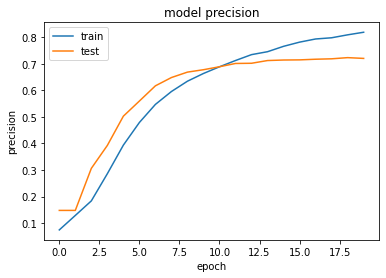

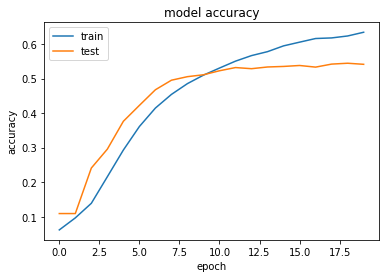

In [ ]:
plt.plot(history.history['precision_8'])
plt.plot(history.history['val_precision_8'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

import textwrap
def wrap(string, max_width):
    return '\n'.join(textwrap.wrap(string,max_width))


_sample = df_test_data.sample(10).copy()

_sample.reset_index(inplace=True)

x_sample = _vectorizer.transform(_sample.body_tokens_clean_stemmer.apply(lambda x: " ".join(x))).copy()

y_sample = multilabel_binarizer.transform(_sample.ylabel_hierarchy_upto_level0).copy()

_predict = model.predict(x_sample.astype("float16"))

_predict = pd.DataFrame(_predict)

_predict.columns = labels
_predict=_predict.round(2)

_temp = pd.DataFrame(_predict.iloc[0],columns =["value"])
_temp[_temp.value >=0.1]

for i in range(_predict.shape[0]):
  _temp = pd.DataFrame(_predict.loc[i])
  _temp.columns =["value"]
  _temp=_temp[_temp.value>0.15].sort_values(by="value",ascending=False)
  print(f"Actual Keywords {_sample.iloc[i].Keywords}")
  print(f"Modified Keywords {_sample.iloc[i].ylabel_hierarchy_upto_level0}")
  print(f"Predicted Keywords {_temp.index.to_list()}")
  print(f"Predicted Keywords {wrap(_sample.iloc[i].body,200)}")
  print("\n")
   


Actual Keywords ['pregnancy']
Modified Keywords ['parenting']
Predicted Keywords ['parenting', 'disease-&-medical-conditions']
Predicted Keywords health tip what are risk factors for preterm labor healthday news a typical pregnancy lasts weeks if labor begins before weeks it s known as preterm labor being born too early can cause a host of
complications ranging from slow growth to problems with the eyes ears breathing and nervous system the american college of obstetricians and gynecologists acog says the acog offers this list of common
risk factors for preterm labor having had preterm labor in this or a previous pregnancy smoking cigarettes or using cocaine having a multiple pregnancy for example carrying twins or triplets having an
abnormality of the cervix or uterus having had an infection during pregnancy bleeding during the second or third trimester being underweight having a mother or grandmother who took a medication called
des during pregnancy having had insufficient medical ca

In [ ]:
# Developing model for P@2


def get_model_for_patk(patk =1):
    
    _model = Sequential()
    _model.add(Dense(256,input_dim=20710,activation="relu"))
    _model.add(Dropout(0.2))
    _model.add(Dense(128,activation="relu"))
    _model.add(Dropout(0.5))
    _model.add(Dense(128,activation="relu"))
    _model.add(Dropout(0.5))
    _model.add(Dense(64,activation="relu"))
    _model.add(Dense(len(labels)))
    _model.add(Activation('sigmoid'))

    # sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    # model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy',tf.keras.metrics.Precision(top_k=3)])
    _model.compile(optimizer='Adam', loss='poisson', metrics=[tf.keras.metrics.Precision(top_k=patk),"categorical_accuracy"])
    _model.summary()

    callbacks = [
        ReduceLROnPlateau(), 
        EarlyStopping(patience=4), 
        ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
    ]

    history = _model.fit(X_train.astype("float16"), y_train,epochs=20,batch_size=500,validation_data=(X_test.astype("float16"),y_test))
    plt.plot(history.history['precision_2'])
    plt.plot(history.history['val_precision_2'])
    plt.title('model precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    return _model

print("Model for K=2")

get_model_for_patk(2)

print("Model for K=3")
get_model_for_patk(3)


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'precision_2', 'categorical_accuracy', 'val_loss', 'val_precision_2', 'val_categorical_accuracy'])


Level-1 performence

In [10]:
#y label alignment for multi class classification

from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_train_data.ylabel_hierarchy_upto_level1)
labels = multilabel_binarizer.classes_
y_train = multilabel_binarizer.transform(df_train_data.ylabel_hierarchy_upto_level1)
y_test = multilabel_binarizer.transform(df_test_data.ylabel_hierarchy_upto_level1)

In [11]:
len(labels)

138

In [13]:

model = Sequential()
model.add(Dense(256,input_dim=20710,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64,activation="relu"))
model.add(Dense(len(labels)))
model.add(Activation('sigmoid'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy',tf.keras.metrics.Precision(top_k=3)])
model.compile(optimizer='Adam', loss='poisson', metrics=[tf.keras.metrics.Precision(top_k=1),tf.keras.metrics.Precision(top_k=2),
                                                         tf.keras.metrics.Precision(top_k=3),"categorical_accuracy"])
model.summary()

callbacks = [
    ReduceLROnPlateau(), 
    EarlyStopping(patience=4), 
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = model.fit(X_train.astype("float16"), y_train,epochs=60,batch_size=500,validation_data=(X_test.astype("float16"),y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               5302016   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [14]:
print(history.history.keys())

dict_keys(['loss', 'precision_6', 'precision_7', 'precision_8', 'categorical_accuracy', 'val_loss', 'val_precision_6', 'val_precision_7', 'val_precision_8', 'val_categorical_accuracy'])


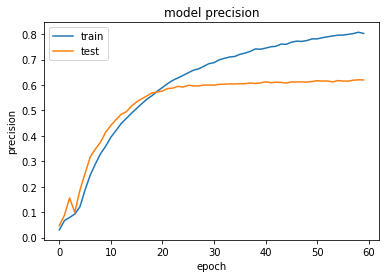

In [15]:
plt.plot(history.history['precision_6'])
plt.plot(history.history['val_precision_6'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [19]:
#y label alignment for multi class classification

from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_train_data.ylabel_hierarchy_upto_level2)
labels = multilabel_binarizer.classes_
y_train = multilabel_binarizer.transform(df_train_data.ylabel_hierarchy_upto_level2)
y_test = multilabel_binarizer.transform(df_test_data.ylabel_hierarchy_upto_level2)

In [21]:
len(labels)

159

In [22]:

model = Sequential()
model.add(Dense(256,input_dim=20710,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64,activation="relu"))
model.add(Dense(len(labels)))
model.add(Activation('sigmoid'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy',tf.keras.metrics.Precision(top_k=3)])
model.compile(optimizer='Adam', loss='poisson', metrics=[tf.keras.metrics.Precision(top_k=1),tf.keras.metrics.Precision(top_k=2),
                                                         tf.keras.metrics.Precision(top_k=3),"categorical_accuracy"])
model.summary()

callbacks = [
    ReduceLROnPlateau(), 
    EarlyStopping(patience=4), 
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = model.fit(X_train.astype("float16"), y_train,epochs=60,batch_size=500,validation_data=(X_test.astype("float16"),y_test))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               5302016   
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)               

KeyboardInterrupt: ignored